# Проект

**Выполнили:** Галстян Артур Левонович, Мельник Анастасия Романовна, Пазникова Анастасия Андреевна 


## Введение

Для данного задания мы взяли датасет, содержащий информацию о фильмах. В этом датасете есть информация о названии фильма, дате выхода, рейтинге, жанре, кратком описании сюжета, съемочной группе, оригинальном названии, статусе выпуска, оригинальном языке, бюджете производства, сборах и стране производства. Давайте рассмотрим, что означает каждая колонка в нашем датасете:


1.   `names` - название фильма
2.   `date_x` - дата выхода фильма
3.   `score` - рейтинг фильма
4.   `genre` - жанр фильма
5.   `overview` - краткое описание сюжета фильма
6.   `crew` - список участников съемочной группы
7.   `orig_title` - оригинальное название фильма
8.   `status` - статус выпуска фильма
9.   `orig_lang` - оригинальный язык фильма
10.  `budget_x` - бюджет производства фильма
11.  `revenue` - сборы фильма
12.  `country` - страна производства фильма



Данные по каждому фильму предоставляют множество возможностей для анализа, визуализации и выявления закономерностей. Давайте проведем EDA для данного датасета, чтобы узнать больше о фильмах и открыть для себя новые и интересные факты.

In [1]:
# импорт библиотек
import random
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

Загрузим нашу таблицу


In [2]:
df_movies = pd.read_csv('imdb_movies.csv', sep=',')
df_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Давайте сначала посмотрим на типы столбцов

In [3]:
df_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

Заметим, что у нас genre должен являться столбцом типа string, а мы сейчас получили, что он типа 

Количество уникальных значение в каждом столбце

In [4]:
df_movies.nunique()

names         9660
date_x        5688
score           79
genre         2303
overview      9905
crew          9927
orig_title    9736
status           3
orig_lang       54
budget_x      2316
revenue       8227
country         60
dtype: int64

Количество пропусков в каждом столбце

In [5]:
df_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

Мы видим, что большинство столбцов не имеют пропущенных значений, за исключением столбца "genre", в котором 85 пропущенных значений, и столбца "crew", в котором 56 пропущенных значений. Это может означать, что не для всех фильмов были указаны жанры и съемочная группа. 

## Часть 1: Предварительная обработка

Для удобства дальнейшей работы мы решили удалить столбцы с описанием фильма и оригинальное название фильма, так как они нам не пригодятся.

Также мы хотим провести анализ жанров, но для этого необходимо разделить жанры, перечисленные в столбце 'genre' через запятую, на отдельные категории и создать для каждого фильма отдельный столбец, в котором будет указано, принадлежит ли фильм к определенному жанру. Мы также занумеруем жанры, чтобы можно было проводить дальнейший анализ.

Вот код для удаления столбца с описанием и разделением жанров:


In [6]:
df_movies = df_movies.drop(['overview', 'orig_title'], axis=1)
columns = df_movies.columns.tolist()
columns.remove('genre')
df_movies.head()

,names,date_x,score,genre,crew,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Released,English,77000000.0,3.409420e+08,US


Код с разделением жанров:


In [7]:
all_genres = set()
for genres in df_movies['genre']:
    if isinstance(genres, str):
        for genre in genres.split(','):
            all_genres.add(genre.strip())

for genre in all_genres:
    df_movies[genre] = df_movies['genre'].fillna('').apply(lambda x: 1 if genre in x else 0)

genres_dict = {}
for i, genre in enumerate(all_genres):
    genres_dict[genre] = i+1

df_movies = df_movies.drop('genre', axis=1)
df_movies.head()

,names,date_x,score,crew,status,orig_lang,budget_x,revenue,country,Thriller,...,Western,Family,Music,Drama,Comedy,Horror,Romance,History,Animation,Mystery
0,Creed III,03/02/2023,73.0,"Michael B. Jordan, Adonis Creed, Tessa Thompso...",Released,English,75000000.0,2.716167e+08,AU,0,...,0,0,0,1,0,0,0,0,0,0
1,Avatar: The Way of Water,12/15/2022,78.0,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Released,English,460000000.0,2.316795e+09,AU,0,...,0,0,0,0,0,0,0,0,0,0
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",Released,English,100000000.0,7.244590e+08,AU,0,...,0,1,0,0,1,0,0,0,1,0
3,Mummies,01/05/2023,70.0,"Óscar Barberán, Thut (voice), Ana Esther Albor...",Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,0,...,0,1,0,0,1,0,0,0,1,0
4,Supercell,03/17/2023,61.0,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Released,English,77000000.0,3.409420e+08,US,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# категории и их id
genres_dict

{'Thriller': 1,
 'TV Movie': 2,
 'Fantasy': 3,
 'Adventure': 4,
 'Documentary': 5,
 'Crime': 6,
 'Science Fiction': 7,
 'Action': 8,
 'War': 9,
 'Western': 10,
 'Family': 11,
 'Music': 12,
 'Drama': 13,
 'Comedy': 14,
 'Horror': 15,
 'Romance': 16,
 'History': 17,
 'Animation': 18,
 'Mystery': 19}

 Для нашего анализа будем использовать только год, поэтому извлечем год из столбцы date_x


In [9]:
df_movies['date_x'] = df_movies['date_x'].str.extract(r'(\d{4})')
df_movies['date_x']

0        2023
1        2022
2        2023
3        2023
4        2023
         ... 
10173    2016
10174    1990
10175    1990
10176    1995
10177    2020
Name: date_x, Length: 10178, dtype: object

## Часть 2: Визуализация

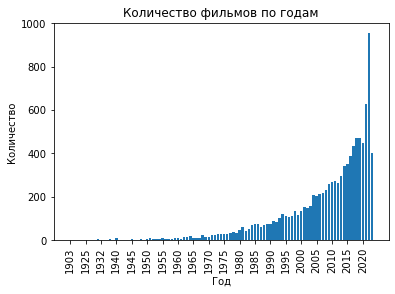

In [10]:
year_counts = df_movies['date_x'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Количество фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(year_counts.index[::5], rotation=90)
plt.show()

Вывод: из графика видно, что с каждым годом количество выпускаемых фильмов увеличивается. Это говорит о росте кинопроизводства в мире.






Text(0.5, 0, 'Оценка')

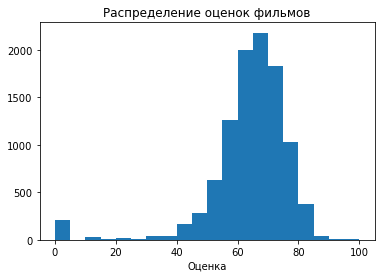

In [11]:
plt.hist(df_movies['score'], bins=20)
plt.title('Распределение оценок фильмов')
plt.xlabel('Оценка')

Исходя из описания графика, можно предположить, что распределение оценок фильмов похоже на нормальное распределение с пиком около значения 70 и симметричным "хвостом" влево и вправо. Построим матрицу корреляции между этими столбцами и выведем ее на экран:



In [12]:
corr_matrix = df_movies[columns].corr()
corr_matrix

,score,budget_x,revenue
score,1.000000,-0.23547,0.096533
budget_x,-0.235470,1.00000,0.673830
revenue,0.096533,0.67383,1.000000


<AxesSubplot:>

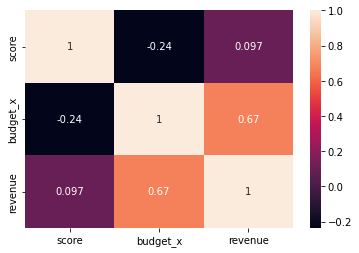

In [13]:
sns.heatmap(corr_matrix, annot = True)

Из таблицы корреляции видно, что между рейтингом фильма и бюджетом производства есть отрицательная корреляция, то есть чем выше рейтинг фильма, тем меньше обычно бюджет его производства. Однако между бюджетом производства и сборами фильма есть положительная корреляция, то есть чем больше бюджет у фильма, тем выше его сборы. Теперь построим диаграммы рассеяния для этих столбцов:

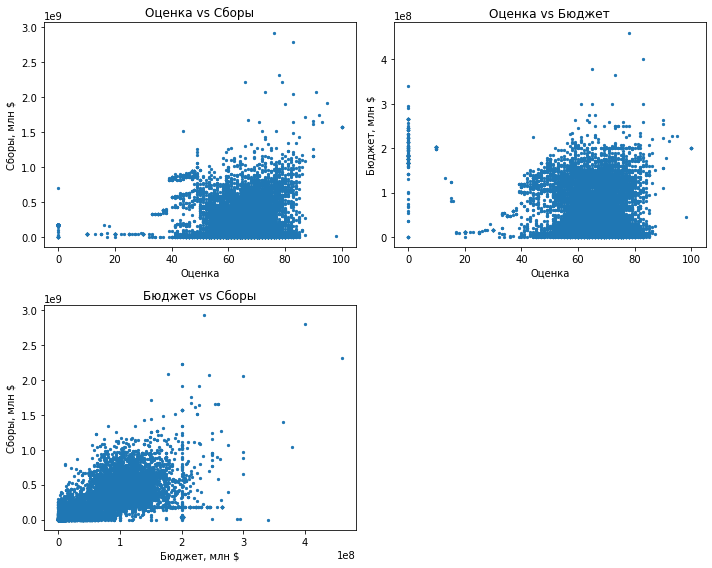

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0, 0].scatter(df_movies['score'], df_movies['revenue'], s=5)
axs[0, 0].set_title('Оценка vs Сборы')
axs[0, 0].set_xlabel('Оценка')
axs[0, 0].set_ylabel('Сборы, млн $')

axs[0, 1].scatter(df_movies['score'], df_movies['budget_x'], s=5)
axs[0, 1].set_title('Оценка vs Бюджет')
axs[0, 1].set_xlabel('Оценка')
axs[0, 1].set_ylabel('Бюджет, млн $')

axs[1, 0].scatter(df_movies['budget_x'], df_movies['revenue'], s=5)
axs[1, 0].set_title('Бюджет vs Сборы')
axs[1, 0].set_xlabel('Бюджет, млн $')
axs[1, 0].set_ylabel('Сборы, млн $')

fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


Проверим, какой жанр принес наибольшие доходы в разных странах и построим соответствующую визуализацию. Для этого нам нужно сгруппировать данные по странам и по каждой стране вычислить сумму доходов для каждого жанра. Затем мы можем выбрать жанр с наибольшей суммой доходов для каждой страны. Для красивого вывода построим график только для фильмов, у которых доход больше миллиарда

In [15]:
df_high_revenue = df_movies.query('revenue > 1000000000')
grouped = df_high_revenue.groupby('country')[list(genres_dict.keys()) + ['revenue']].sum()
grouped.head()

,Thriller,TV Movie,Fantasy,Adventure,Documentary,Crime,Science Fiction,Action,War,Western,Family,Music,Drama,Comedy,Horror,Romance,History,Animation,Mystery,revenue
country,,,,,,,,,,,,,,,,,,,,
AR,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.569324e+09
AU,12,3,24,44,1,7,25,39,1,1,23,2,14,12,0,6,0,21,2,8.950908e+10
ES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.075683e+09
FR,0,2,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,4.649804e+09
GB,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.157477e+09


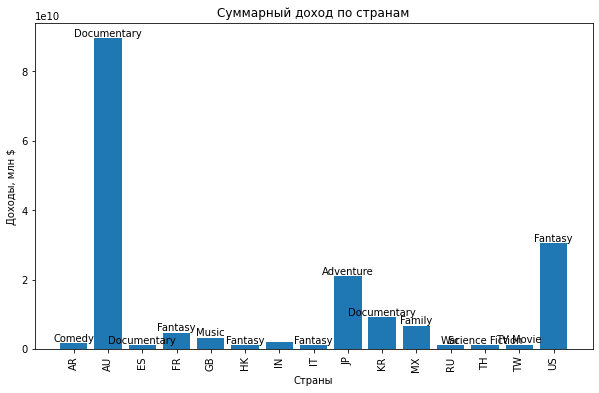

In [16]:
top_genres = []
for country in grouped.index:
    max_revenue = 0
    top_genre = ''
    for genre in genres_dict.keys():
        if grouped.loc[country, genre] == 1 and grouped.loc[country, 'revenue'] > max_revenue:
            max_revenue = grouped.loc[country, 'revenue']
            top_genre = genre
    top_genres.append(top_genre)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped.index, grouped['revenue'])
ax.set_title('Суммарный доход по странам')
ax.set_xlabel('Страны')
ax.set_ylabel('Доходы, млн $')
ax.tick_params(axis='x', labelrotation=90)
for i, genre in enumerate(top_genres):
    if genre != '':
        ax.text(i, grouped.loc[grouped.index[i], 'revenue'], genre, ha='center', va='bottom')
plt.show()

## Часть 3: Создание новых признаков

Создадим новый столбец, в котором отметим, является ли фильм новой частью франшизы или нет?

In [17]:
def is_new_part(movie_title):
    keywords = ['part', 'sequel', 'prequel','chapter', 'act', 'Part', 'Sequel', 'Prequel', 'Chapter', 'Act', 
                '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', 'II ', 'III ', 'IV ', 'V ', 'VI ', 'VII ', 
               'VIII', 'IX ', ':']

    for keyword in keywords:
        if keyword in movie_title:
            return 1
    
    return 0

In [18]:
df_movies['new part'] = df_movies['names'].apply(is_new_part)

Конечно, что-то мы возможно упустили, но в целом это должно возыметь эффект.

Перейдем от год выпуска к возрасту фильма.

In [19]:
df_movies['date_x'] = df_movies['date_x'].astype(int)
df_movies['age'] = 2023 - df_movies['date_x']

Создадим столбец, где будем помечать, сколько популярных актеров снималось в фильме. Для этого сначала найдем топ 250 самых популярных актеров.

In [20]:
actors_list = df_movies['crew'].str.split(',').explode().str.strip().tolist()
filtered_actors_list = list(filter(lambda x: isinstance(x, str) and len(x.split()) >= 2, actors_list))
actor_counts = pd.Series(filtered_actors_list).value_counts()
top_100_actors = actor_counts.head(250).index.tolist()

In [21]:
def count_actors_in_top_100(row):
    if isinstance(row['crew'], str):
        actors = set(row['crew'].split(','))
        return len(actors.intersection(set(top_100_actors)))
    else:
        return 0

In [22]:
df_movies['n_famous'] = df_movies.apply(count_actors_in_top_100, axis=1)

Создадим новый признак: *авторское* кино или нет? Если страна фильма и язык фильма не совпадает значит кино авторское.

In [23]:
country_lang = {'AU': ' English', 'US': ' English', 'MX': ' Spanish, Castilian', 'GB': ' English', 'CL': 
                    ' Spanish, Castilian', 'NO': ' Norwegian', 'ES': ' Spanish, Castilian', 'AR': ' Spanish, Castilian', 
                    'KR': ' Korean', 'HK': ' Chinese', 'UA': ' Russian', 'IT': ' Italian', 'RU': ' Russian', 
                    'CO': ' Spanish, Castilian', 'DE': ' German', 'JP': ' Japanese', 'FR': ' French', 'FI': ' Finnish', 
                    'IS': ' Icelandic', 'ID': ' Indonesian', 'BR': ' Portuguese', 'BE': ' Dutch, Flemish',  'DK': ' Danish', 
                    'TR': ' Turkish', 'TH': ' Thai', 'PL': ' Polish', 'GT': ' Spanish, Castilian', 'CN': ' Chinese', 
                    'CZ': ' Czech', 'PH': ' Tagalog', 'ZA': ' English', 'CA': ' English', 'NL': ' Dutch, Flemish', 
                    'TW': ' Chinese', 'PR': ' Spanish, Castilian', 'IN': ' Hindi', 'IE': ' Irish', 'SG': ' English', 
                    'PE': ' Spanish, Castilian',  'CH': ' German',  'SE': ' Swedish', 'IL': ' Hebrew', 
                    'DO': ' Spanish, Castilian', 'VN': ' Vietnamese', 'GR': ' Greek', 'SU': ' Russian', 'HU': ' Hungarian', 
                    'BO': ' Spanish, Castilian', 'SK': ' Slovak', 'UY': ' Spanish, Castilian', 'BY': ' Russian', 
                    'AT': ' German', 'PY': ' Spanish, Castilian', 'MY': ' Malay', 'MU': ' English', 'LV': ' Latvian', 
                    'XC': ' Czech', 'PT': ' Portuguese', 'KH': ' Central Khmer', 'IR': ' Persian'}

In [24]:
df_movies['is_author_cinema'] = df_movies.apply(lambda row: 1 if row['orig_lang'] != country_lang.get(row['country']) 
                                                else 0, axis=1)

Уберем ненужные переменные.

In [25]:
df_movies = df_movies.drop(columns=['names', 'date_x', 'crew'])

Закодируем оставшиеся категориальные переменные.

In [26]:
df_movies['status'] = df_movies['status'].replace(' Released', 1).replace([' Post Production', ' In Production'], 0)

value_counts = df_movies['orig_lang'].value_counts()
rare_languages = value_counts[value_counts < 50].index.tolist()
df_movies['orig_lang'] = df_movies['orig_lang'].apply(lambda x: ' Uncommon' if x in rare_languages else x)

value_counts = df_movies['country'].value_counts()
rare_country = value_counts[value_counts < 50].index.tolist()
df_movies['country'] = df_movies['country'].apply(lambda x: 'Small' if x in rare_country else x)

In [27]:
df_movies = pd.get_dummies(df_movies, columns=['orig_lang', 'country'])

In [28]:
df_movies.head()

,score,status,budget_x,revenue,Thriller,TV Movie,Fantasy,Adventure,Documentary,Crime,...,country_FR,country_GB,country_HK,country_IT,country_JP,country_KR,country_MX,country_RU,country_Small,country_US
0,73.0,1,75000000.0,2.716167e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78.0,1,460000000.0,2.316795e+09,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76.0,1,100000000.0,7.244590e+08,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,70.0,1,12300000.0,3.420000e+07,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,61.0,1,77000000.0,3.409420e+08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Часть 4: Гипотезы

Используем 5% уровень значимости.

**Гипотеза 1.** Интересно посмотреть, правда ли, что в среднем в США снимают самые кассовые фильмы?


$$
\begin{aligned}
& H_0: \mu_{USA} = \mu_{Other} \\
& H_1: \mu_{USA} > \mu_{Other}
\end{aligned}
$$

In [29]:
df_a = df_movies[df_movies['country_US'] == 1]
df_b = df_movies[df_movies['country_US'] == 0]

Проверим выборки на нормальное распределение.

In [30]:
x, shapiro_a = sts.shapiro(df_a['revenue'])
x, shapiro_b = sts.shapiro(df_b['revenue'])

print(round(shapiro_a, 3))
print(round(shapiro_b, 3))

0.0
0.0


Выборки независимы и без нормального распределения. Используем тест Манна — Уитни.

In [31]:
x, p_value = sts.mannwhitneyu(df_a['revenue'], df_b['revenue'], alternative='greater')

print('p-value:', round(p_value, 3))

p-value: 0.33


Отвергаем нашу гипотезу. Американские фильмы собирают в прокате столько же, сколько и фильмы других стран.

**Гипотеза 2.** Правда ли, что в России не умеют снимать хорошее кино?

$$
\begin{aligned}
& H_0: \mu_{RU} = \mu_{Other} \\
& H_1: \mu_{RU} < \mu_{Other}
\end{aligned}
$$

In [32]:
df_a = df_movies[df_movies['country_RU'] == 1]
df_b = df_movies[df_movies['country_RU'] == 0]

Проверим выборки на нормальное распределение.

In [33]:
x, shapiro_a = sts.shapiro(df_a['score'])
x, shapiro_b = sts.shapiro(df_b['score'])

print(round(shapiro_a, 3))
print(round(shapiro_b, 3))

0.0
0.0


Выборки независимы и без нормального распределения. Используем тест Манна — Уитни.

In [34]:
x, p_value = sts.mannwhitneyu(df_a['score'], df_b['score'], alternative='less')

print('p-value:', round(p_value, 3))

p-value: 0.126


Отвергаем гипотезу. в России такое же качество фильмов, как и в мире.

**Гипотеза 3.** Правда ли, что самые дорогие фильмы снимают в жанре экшена?

$$
\begin{aligned}
& H_0: \mu_{action} = \mu_{other} \\
& H_1: \mu_{action} > \mu_{other}
\end{aligned}
$$

In [35]:
df_a = df_movies[df_movies['Action'] == 1]
df_b = df_movies[df_movies['Action'] == 0]

Проверим выборки на нормальное распределение.

In [36]:
x, shapiro_a = sts.shapiro(df_a['budget_x'])
x, shapiro_b = sts.shapiro(df_b['budget_x'])

print(round(shapiro_a, 3))
print(round(shapiro_b, 3))

0.0
0.0


Выборки независимы и без нормального распределения. Используем тест Манна — Уитни.

In [37]:
x, p_value = sts.mannwhitneyu(df_a['budget_x'], df_b['budget_x'], alternative='greater')

print('p-value:', round(p_value, 3))

p-value: 0.0


Подтверждаем гипотезу. Экшен фильмы стоят в производстве дороже, чем другие.

**Гипотеза 4.** Правда ли, что есть разница, между оценкой зрителями комедийных и драматических фильмов?

$$
\begin{aligned}
& H_0: \mu_{comedy} = \mu_{drama} \\
& H_1: \mu_{comedy} \neq \mu_{drama}
\end{aligned}
$$

In [38]:
df_a = df_movies[df_movies['Comedy'] == 1]
df_b = df_movies[df_movies['Drama'] == 0]

Проверим выборки на нормальное распределение.

In [39]:
x, shapiro_a = sts.shapiro(df_a['score'])
x, shapiro_b = sts.shapiro(df_b['score'])

print(round(shapiro_a, 3))
print(round(shapiro_b, 3))

0.0
0.0


Выборки независимы и без нормального распределения. Используем тест Манна — Уитни.

In [40]:
x, p_value = sts.mannwhitneyu(df_a['score'], df_b['score'], alternative='two-sided')

print('p-value:', round(p_value, 3))

p-value: 0.0


Подтверждаем гипотезу. Действительно зрители оценивают комедиии и драмы по-разному.

**Гипотеза 5.** Правда ли, что последние 20 лет доля фантастики выросла?

$$
\begin{aligned}
& H_0: p_{new} = p_{old} \\
& H_1: p_{new} > p_{old}
\end{aligned}
$$

In [44]:
df_a = df_movies[df_movies['age'] <= 20]
df_b = df_movies[df_movies['age'] > 20]

Используем z-тест для разности долей.

In [45]:
x, p_value = proportions_ztest([df_a['Fantasy'].sum(), df_b['Fantasy'].sum()], [len(df_a), len(df_b)])

print('p-value:', round(p_value, 3))

p-value: 0.546


In [46]:
p1 = df_a['Fantasy'].mean()
p2 = df_b['Fantasy'].mean()

print(round(p1, 3), round(p2, 3))

0.137 0.132


Отвергаем гипотезу гипотезу. Доля фантастики не изменилась.

**Гипотеза 6.** Проверим гипотезу, что наличие популярных актеров в фильме увеличивает сборы.

$$
\begin{aligned}
& H_0: \mu_{popular} = \mu_{unpopular} \\
& H_1: \mu_{popular} > \mu_{unpopular}
\end{aligned}
$$

In [47]:
df_a = df_movies[df_movies['n_famous'] > 0]
df_b = df_movies[df_movies['n_famous'] == 0]

Проверим выборки на нормальное распределение.

In [48]:
x, shapiro_a = sts.shapiro(df_a['revenue'])
x, shapiro_b = sts.shapiro(df_b['revenue'])

print(round(shapiro_a, 3))
print(round(shapiro_b, 3))

0.0
0.0


Выборки независимы и без нормального распределения. Используем тест Манна — Уитни.

In [49]:
x, p_value = sts.mannwhitneyu(df_a['revenue'], df_b['revenue'], alternative='greater')

print('p-value:', round(p_value, 3))

p-value: 1.0


Отвергаем гипотезу. Известные актеры не приносят дополнительных сборов.

**Гипотеза 7.** Правда ли, что *авторское* кино нравится зрителям больше?

$$
\begin{aligned}
& H_0: \mu_{author} = \mu_{commerce} \\
& H_1: \mu_{author} > \mu_{commerce}
\end{aligned}
$$

In [50]:
df_a = df_movies[df_movies['is_author_cinema'] == 1]
df_b = df_movies[df_movies['is_author_cinema'] == 0]

Проверим выборки на нормальное распределение.

In [51]:
x, shapiro_a = sts.shapiro(df_a['score'])
x, shapiro_b = sts.shapiro(df_b['score'])

print(round(shapiro_a, 3))
print(round(shapiro_b, 3))

0.0
0.0


Выборки независимы и без нормального распределения. Используем тест Манна — Уитни.

In [52]:
x, p_value = sts.mannwhitneyu(df_a['score'], df_b['score'], alternative='greater')

print('p-value:', round(p_value, 3))

p-value: 0.0


Подтверждаем гипотезу. У авторского кино оценки выше.

## Часть 5: Машинное обучение ##

Будем предсказывать выручку фильмов, для оценки качества моделей возьмем MAPE.

Разобьем данные на обучающие и тестовые и разобьем переменные на независимые и зависимую.

In [53]:
train_df, test_df = train_test_split(df_movies, test_size=0.2, random_state=5)

X_train = train_df.drop(columns=['revenue'])
y_train = train_df['revenue']

X_test = test_df.drop(columns=['revenue'])
y_test = test_df['revenue']

Масштабируем данные, используя standar scaler.

In [54]:
scale = StandardScaler()
X_train_scale = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(scale.fit_transform(X_test), columns=X_train.columns, index=X_test.index)

Создаем линейную регрессию и считаем качество модели.

In [55]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

y_pred = lr.predict(X_test_scale)

print(round(mean_absolute_percentage_error(y_test, y_pred)))

688053424392218640910051755163648


Очевидно нужно использовать не линейные модели, а случайный лес или градиентный бустинг.

In [56]:
rfr = RandomForestRegressor()
rfr.fit(X_train_scale, y_train)

y_pred = rfr.predict(X_test_scale)

print(round(mean_absolute_percentage_error(y_test, y_pred)))

6389247239180322340864
